In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats

In [2]:
# a command for seaborn plots
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [3]:
df = pd.read_csv('GR15_contributions.csv')

In [4]:
df.shape

(453870, 10)

In [5]:
df.isna().sum()

address                           0
grant_id                          0
checkout_type                     7
amount_in_usdt                    0
raw_amount_in_token               0
token                             0
amount_in_token_minus_gas         0
tx_id                        397128
created_on                        0
modified_on                       0
dtype: int64

In [6]:
df.nunique()

address                       58793
grant_id                       1487
checkout_type                     4
amount_in_usdt                24877
raw_amount_in_token           11211
token                            38
amount_in_token_minus_gas     11211
tx_id                          7740
created_on                   449191
modified_on                  453870
dtype: int64

In [7]:
df.head()

,address,grant_id,checkout_type,amount_in_usdt,raw_amount_in_token,token,amount_in_token_minus_gas,tx_id,created_on,modified_on
0,0x76f69dcddd0593b0aff5fd3280c3433ddb68e0d2,12,eth_std,0.064183,0.000050,ETH,0.000050,NaN,2022-09-22 23:59:57.030620+00:00,2022-09-23 00:12:56.621368+00:00
1,0x76f69dcddd0593b0aff5fd3280c3433ddb68e0d2,6972,eth_std,1.283650,0.001000,ETH,0.001000,NaN,2022-09-22 23:59:55.773190+00:00,2022-09-23 00:12:57.306838+00:00
2,0x1bc5ebee4738fd95bd96751c45a90889f772e0f3,12,eth_zksync,1.351683,0.001053,ETH,0.001053,NaN,2022-09-22 23:59:53.982857+00:00,2022-09-23 00:12:57.665947+00:00
3,0x1bc5ebee4738fd95bd96751c45a90889f772e0f3,2400,eth_zksync,1.001247,0.000780,ETH,0.000780,NaN,2022-09-22 23:59:53.052568+00:00,2022-09-23 00:12:58.645416+00:00
4,0x3812801cbf0e41413db4835a5e36228ad45e32bf,7243,eth_polygon,1.001943,1.350000,MATIC,1.350000,NaN,2022-09-22 23:59:52.331798+00:00,2022-09-23 00:12:59.197666+00:00


In [8]:
# looking at an address and its actions
df[df['address'] == '0x1bc5ebee4738fd95bd96751c45a90889f772e0f3'].sort_values('created_on').head()

,address,grant_id,checkout_type,amount_in_usdt,raw_amount_in_token,token,amount_in_token_minus_gas,tx_id,created_on,modified_on
408154,0x1bc5ebee4738fd95bd96751c45a90889f772e0f3,5719,eth_polygon,1.775130,2.00000,MATIC,2.00000,NaN,2022-09-10 13:52:40.788367+00:00,2022-09-10 14:13:12.228947+00:00
58,0x1bc5ebee4738fd95bd96751c45a90889f772e0f3,7953,eth_zksync,1.001247,0.00078,ETH,0.00078,NaN,2022-09-22 23:59:30.181099+00:00,2022-09-23 00:13:27.081947+00:00
57,0x1bc5ebee4738fd95bd96751c45a90889f772e0f3,7940,eth_zksync,1.001247,0.00078,ETH,0.00078,NaN,2022-09-22 23:59:31.101745+00:00,2022-09-23 00:13:26.760741+00:00
56,0x1bc5ebee4738fd95bd96751c45a90889f772e0f3,7900,eth_zksync,1.001247,0.00078,ETH,0.00078,NaN,2022-09-22 23:59:31.860097+00:00,2022-09-23 00:13:26.382862+00:00
54,0x1bc5ebee4738fd95bd96751c45a90889f772e0f3,7812,eth_zksync,1.001247,0.00078,ETH,0.00078,NaN,2022-09-22 23:59:32.673513+00:00,2022-09-23 00:13:25.347538+00:00


In [9]:
df = df.drop('tx_id', axis=1)
df.head()

,address,grant_id,checkout_type,amount_in_usdt,raw_amount_in_token,token,amount_in_token_minus_gas,created_on,modified_on
0,0x76f69dcddd0593b0aff5fd3280c3433ddb68e0d2,12,eth_std,0.064183,0.000050,ETH,0.000050,2022-09-22 23:59:57.030620+00:00,2022-09-23 00:12:56.621368+00:00
1,0x76f69dcddd0593b0aff5fd3280c3433ddb68e0d2,6972,eth_std,1.283650,0.001000,ETH,0.001000,2022-09-22 23:59:55.773190+00:00,2022-09-23 00:12:57.306838+00:00
2,0x1bc5ebee4738fd95bd96751c45a90889f772e0f3,12,eth_zksync,1.351683,0.001053,ETH,0.001053,2022-09-22 23:59:53.982857+00:00,2022-09-23 00:12:57.665947+00:00
3,0x1bc5ebee4738fd95bd96751c45a90889f772e0f3,2400,eth_zksync,1.001247,0.000780,ETH,0.000780,2022-09-22 23:59:53.052568+00:00,2022-09-23 00:12:58.645416+00:00
4,0x3812801cbf0e41413db4835a5e36228ad45e32bf,7243,eth_polygon,1.001943,1.350000,MATIC,1.350000,2022-09-22 23:59:52.331798+00:00,2022-09-23 00:12:59.197666+00:00


In [10]:
df[df['grant_id'] == 2400].sort_values('created_on')

,address,grant_id,checkout_type,amount_in_usdt,raw_amount_in_token,token,amount_in_token_minus_gas,created_on,modified_on
376748,0xa08ee623da29bb4e9ec9d0f317def01ee86f91bd,2400,eth_zksync,5.000000,5.00000,DAI,5.00000,2022-09-11 16:14:56.436067+00:00,2022-09-11 16:27:18.520746+00:00
345670,0x1a74d0285a569120aa2836cb2b0fa58038adb800,2400,eth_polygon,4.577325,5.00000,MATIC,5.00000,2022-09-12 17:03:19.779230+00:00,2022-09-12 17:11:30.914227+00:00
290919,0x64766a112b319dbcd77e3b20dff62b15693c2c70,2400,eth_zksync,1.000000,1.00000,DAI,1.00000,2022-09-15 00:04:33.023925+00:00,2022-09-15 00:21:03.642493+00:00
275642,0xb9b93bf2db3678b010e71ef701d763aee144e93e,2400,eth_zksync,1.000000,1.00000,DAI,1.00000,2022-09-15 20:05:54.316133+00:00,2022-09-15 20:10:39.056451+00:00
275099,0x171d47316d7d3dc538ec7c285692e93f525fb069,2400,eth_zksync,1.100000,1.10000,DAI,1.10000,2022-09-15 21:16:58.635532+00:00,2022-09-16 00:13:43.285169+00:00
234788,0xa64f2228ccec96076c82abb903021c33859082f8,2400,eth_polygon,1.132033,1.40000,MATIC,1.40000,2022-09-17 14:37:20.127741+00:00,2022-09-17 15:53:09.196962+00:00
3,0x1bc5ebee4738fd95bd96751c45a90889f772e0f3,2400,eth_zksync,1.001247,0.00078,ETH,0.00078,2022-09-22 23:59:53.052568+00:00,2022-09-23 00:12:58.645416+00:00


In [11]:
help_df = df.groupby('token').count()
help_df

,address,grant_id,checkout_type,amount_in_usdt,raw_amount_in_token,amount_in_token_minus_gas,created_on,modified_on
token,,,,,,,,
1INCH,5,5,5,5,5,5,5,5
ALGO,4,4,0,4,4,4,4,4
APE,14,14,14,14,14,14,14,14
BADGER,4,4,4,4,4,4,4,4
BAL,9,9,9,9,9,9,9,9
BAT,23,23,23,23,23,23,23,23
BICO,2,2,2,2,2,2,2,2
BNB,1,1,0,1,1,1,1,1
BOBA,7,7,7,7,7,7,7,7


In [12]:
help_df.loc[['DAI', 'ETH', 'MATIC', 'USDC', 'USDT']]

,address,grant_id,checkout_type,amount_in_usdt,raw_amount_in_token,amount_in_token_minus_gas,created_on,modified_on
token,,,,,,,,
DAI,118056,118056,118056,118056,118056,118056,118056,118056
ETH,204564,204564,204564,204564,204564,204564,204564,204564
MATIC,28839,28839,28839,28839,28839,28839,28839,28839
USDC,83900,83900,83900,83900,83900,83900,83900,83900
USDT,17434,17434,17434,17434,17434,17434,17434,17434


In [13]:
help_df.drop(['DAI', 'ETH', 'MATIC', 'USDC', 'USDT']).address.sum()

1077

In [14]:
token_df = help_df.loc[['DAI', 'ETH', 'MATIC', 'USDC', 'USDT']].address.reset_index().sort_values('address', ascending=False)
token_df

,token,address
1,ETH,204564
0,DAI,118056
3,USDC,83900
2,MATIC,28839
4,USDT,17434


In [15]:
token_df.loc[len(token_df.index)] = ['Other', 1077]
token_df

,token,address
1,ETH,204564
0,DAI,118056
3,USDC,83900
2,MATIC,28839
4,USDT,17434
5,Other,1077


<AxesSubplot:xlabel='token', ylabel='address'>

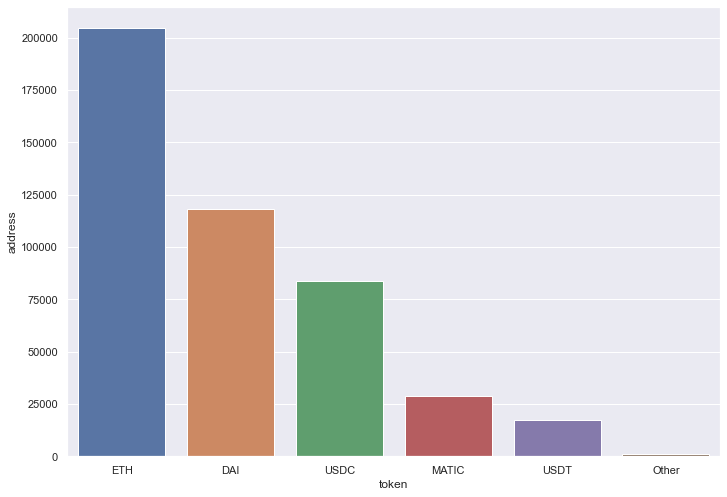

In [16]:
sns.barplot(data=token_df, x='token', y='address')

In [17]:
token_amount_df = df.groupby('token').amount_in_usdt.sum()
token_amount_df

token
1INCH         22.926338
ALGO           6.519274
APE           31.703187
BADGER        61.982610
BAL           19.486127
BAT           52.444760
BICO           3.282275
BNB            1.362249
BOBA           7.695141
BUSD           2.096941
BZZ         4197.423957
CELO           1.759713
COMP           4.033110
DAI       315152.335949
ETH       566591.530652
FRAX       84000.000000
GRT            3.000601
LINK         602.097868
LPT           15.609000
MANA           1.490475
MATIC      47668.829615
OUSD          52.150162
PAN         3973.301175
PERP          43.679506
RAI          129.443586
SEED          13.039166
SNX            9.278409
STORJ          6.321000
SUSHI         54.942701
UBI          828.264136
UNI          742.279678
USDC      228433.452850
USDT       38148.685690
WBTC          56.530524
WETH         955.133533
ZRX           60.270587
cUSD           0.992560
sUSD          28.350000
Name: amount_in_usdt, dtype: float64

In [18]:
token_amount_df.drop(['DAI', 'ETH', 'MATIC', 'USDC', 'USDT']).sum().round()

95989.0

In [19]:
token_amount_df = token_amount_df.loc[['DAI', 'ETH', 'MATIC', 'USDC', 'USDT']].round().reset_index().sort_values('amount_in_usdt', ascending=False)
token_amount_df

,token,amount_in_usdt
1,ETH,566592.0
0,DAI,315152.0
3,USDC,228433.0
2,MATIC,47669.0
4,USDT,38149.0


In [21]:
token_amount_df.loc[len(token_amount_df.index)] = ['Other', 95989.0]
token_amount_df

,token,amount_in_usdt
1,ETH,566592.0
0,DAI,315152.0
3,USDC,228433.0
2,MATIC,47669.0
4,USDT,38149.0
5,Other,95989.0


<AxesSubplot:xlabel='token', ylabel='amount_in_usdt'>

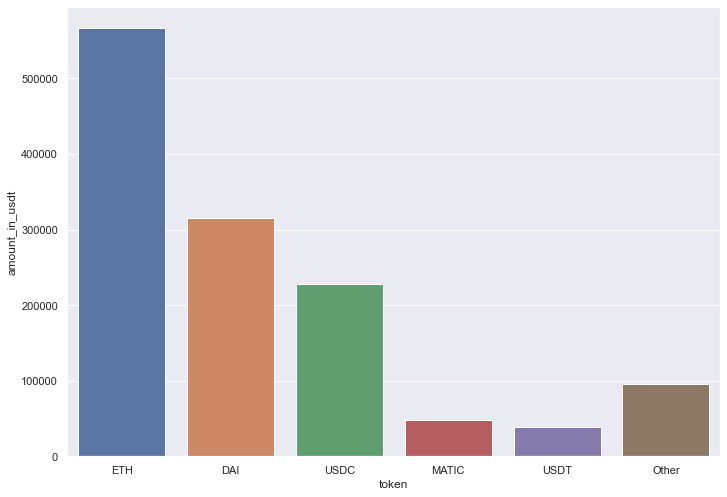

In [22]:
sns.barplot(data=token_amount_df, x='token', y='amount_in_usdt')

In [23]:
df.groupby('checkout_type', as_index=False).count()

,checkout_type,address,grant_id,amount_in_usdt,raw_amount_in_token,token,amount_in_token_minus_gas,created_on,modified_on
0,celo_std,2,2,2,2,2,2,2,2
1,eth_polygon,45435,45435,45435,45435,45435,45435,45435,45435
2,eth_std,107965,107965,107965,107965,107965,107965,107965,107965
3,eth_zksync,300461,300461,300461,300461,300461,300461,300461,300461


In [24]:
chain_df = df.groupby('checkout_type', as_index=False).count().drop(0)[['checkout_type', 'address']].sort_values('address', ascending=False)
chain_df

,checkout_type,address
3,eth_zksync,300461
2,eth_std,107965
1,eth_polygon,45435


<AxesSubplot:xlabel='checkout_type', ylabel='address'>

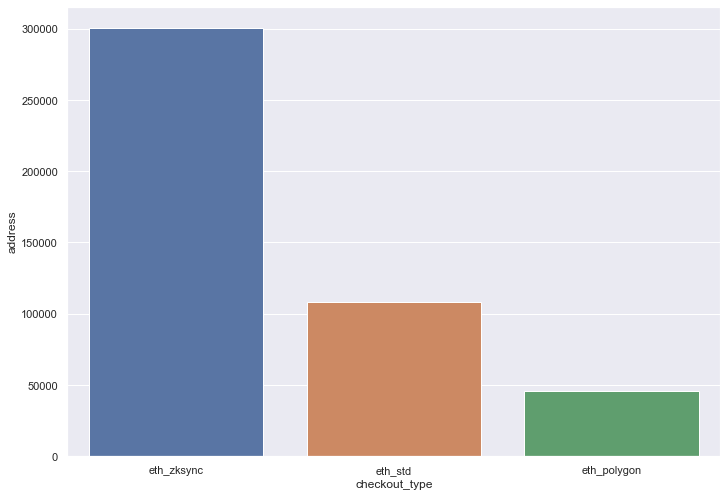

In [25]:
sns.barplot(data=chain_df, x='checkout_type', y='address')

In [26]:
amount_df = df.groupby('checkout_type', as_index=False).amount_in_usdt.sum().round().drop(0).iloc[::-1]
amount_df

,checkout_type,amount_in_usdt
3,eth_zksync,539822.0
2,eth_std,665529.0
1,eth_polygon,86620.0


<AxesSubplot:xlabel='checkout_type', ylabel='amount_in_usdt'>

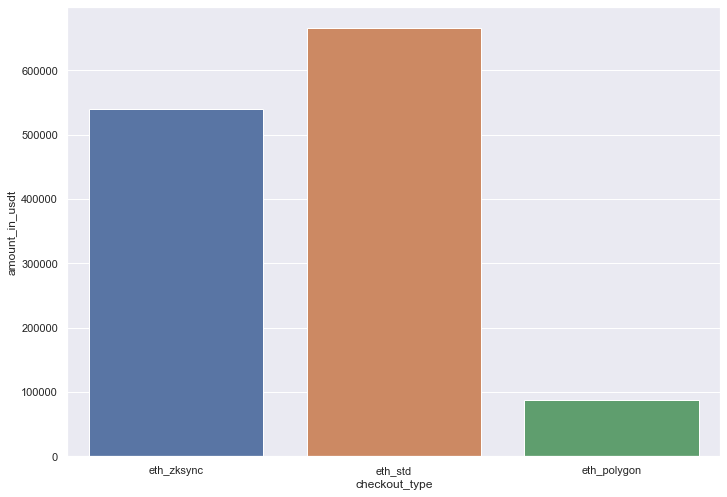

In [27]:
sns.barplot(data=amount_df, x='checkout_type', y='amount_in_usdt')

In [28]:
amt_per_adr = df.groupby(['checkout_type', 'address'])['amount_in_usdt'].sum().round().reset_index()
amt_per_adr

,checkout_type,address,amount_in_usdt
0,celo_std,0x0,3.0
1,eth_polygon,0x0000ce08fa224696a819877070bf378e8b131acf,5.0
2,eth_polygon,0x000bec82c41837d974899b26b26f9cc8890af9ea,1.0
3,eth_polygon,0x000dbf2733da51135c1b21c8ef71a3d474383f0d,1.0
4,eth_polygon,0x00196db2232b8333660f6eb63843010cd9c9fad1,9.0
...,...,...,...
67257,eth_zksync,0xfffa92ec41925b4f4fa44cef294083cbe16b02f5,9.0
67258,eth_zksync,0xfffb40347816873ca038756cc87bc610144166b2,13.0
67259,eth_zksync,0xfffbbbc0504cc643ef14cd89269c4d9cbce428c9,178.0
67260,eth_zksync,0xfffbbc2c1ac92336c67ed6ae2fdab28c213489ea,13.0


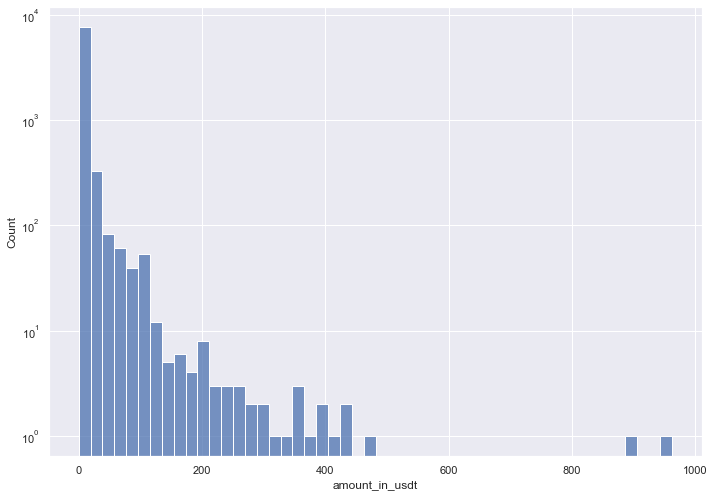

In [29]:
sns.histplot(amt_per_adr['amount_in_usdt'].loc[amt_per_adr['checkout_type'] == 'eth_polygon'], bins=50)
plt.yscale('log')

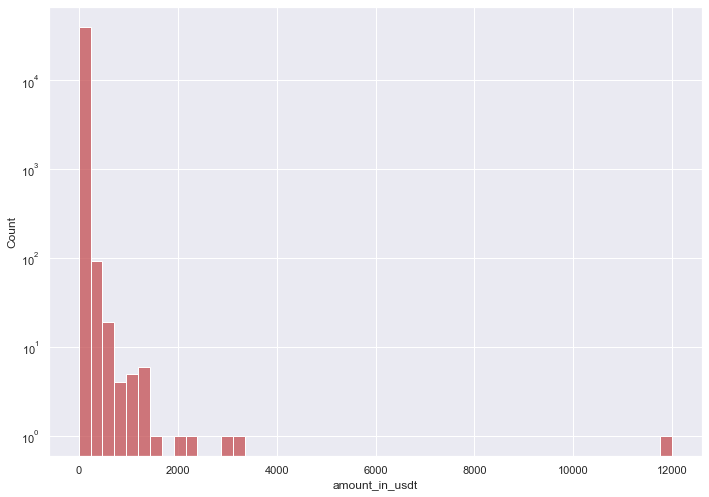

In [30]:
sns.histplot(amt_per_adr['amount_in_usdt'].loc[amt_per_adr['checkout_type'] == 'eth_zksync'], color='r', bins=50)
plt.yscale('log')

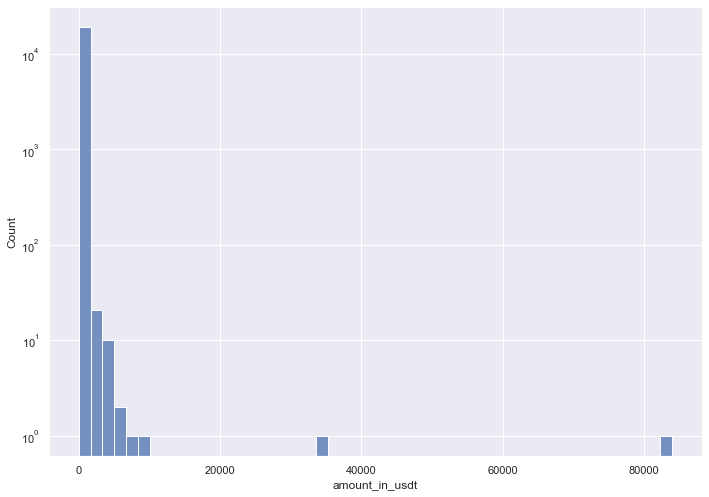

In [31]:
sns.histplot(amt_per_adr['amount_in_usdt'].loc[amt_per_adr['checkout_type'] == 'eth_std'], bins=50)
plt.yscale('log')

In [32]:
tx_per_adr = df.groupby('address', as_index=False).grant_id.count().rename(columns={'grant_id': 'num_of_tx'})
tx_per_adr.head()

,address,num_of_tx
0,0x0,2
1,0x00000000000cd56832ce5dfbcbff02e7ec639bc9,13
2,0x000000000f709dfe4346b80009b8a5197f79aa14,1
3,0x000000005ebfb5a950f8fdf3248e99614a7ff220,2
4,0x000000085d9a759bb5c3d459d638739c0f48deb0,1


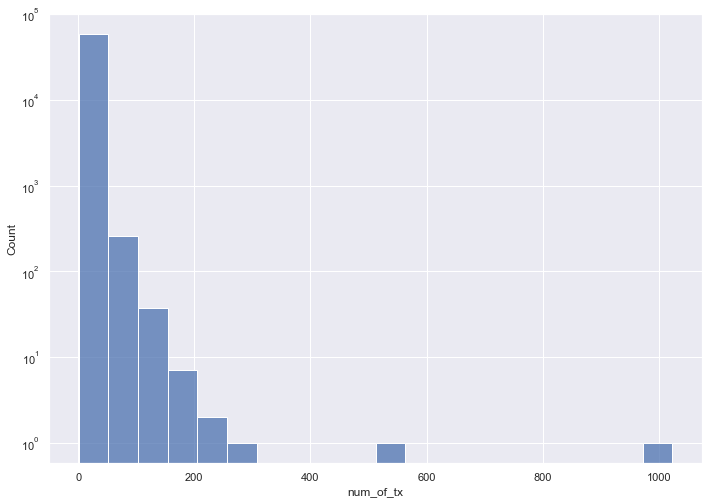

In [33]:
sns.histplot(tx_per_adr['num_of_tx'], bins=20)
plt.yscale('log')